In [1]:
from core import *
from utils import *
from diagnostics import *
from fields import *
from constants import *
from distributions import *

from scipy import constants as sp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import njit

import cProfile

def plot_traj(history):
    fig = plt.figure(figsize = plt.figaspect(1) * 7)
    ax = fig.add_subplot(111, projection='3d')

    for i in range(trials):
        pos = history[i, :, 0]
        ax.plot(pos[:, 0], pos[:, 1], pos[:, 2])

    plt.show()
    
def plot_gca(gca):
    fig = plt.figure(figsize = plt.figaspect(1) * 7)
    ax = fig.add_subplot(111, projection='3d')

    for i in range(trials):
        pos = gca[i, :, :]
        ax.plot(pos[:, 0], pos[:, 1], pos[:, 2])

    plt.show()
    
def to_percent(observed, actual):
    return abs((observed - actual) / actual) * 100

Load IGRF coefficients ...


In [2]:
e_field = zero_field()
b_field = t89(0)
solve   = solver(relativistic_boris(e_field, b_field))

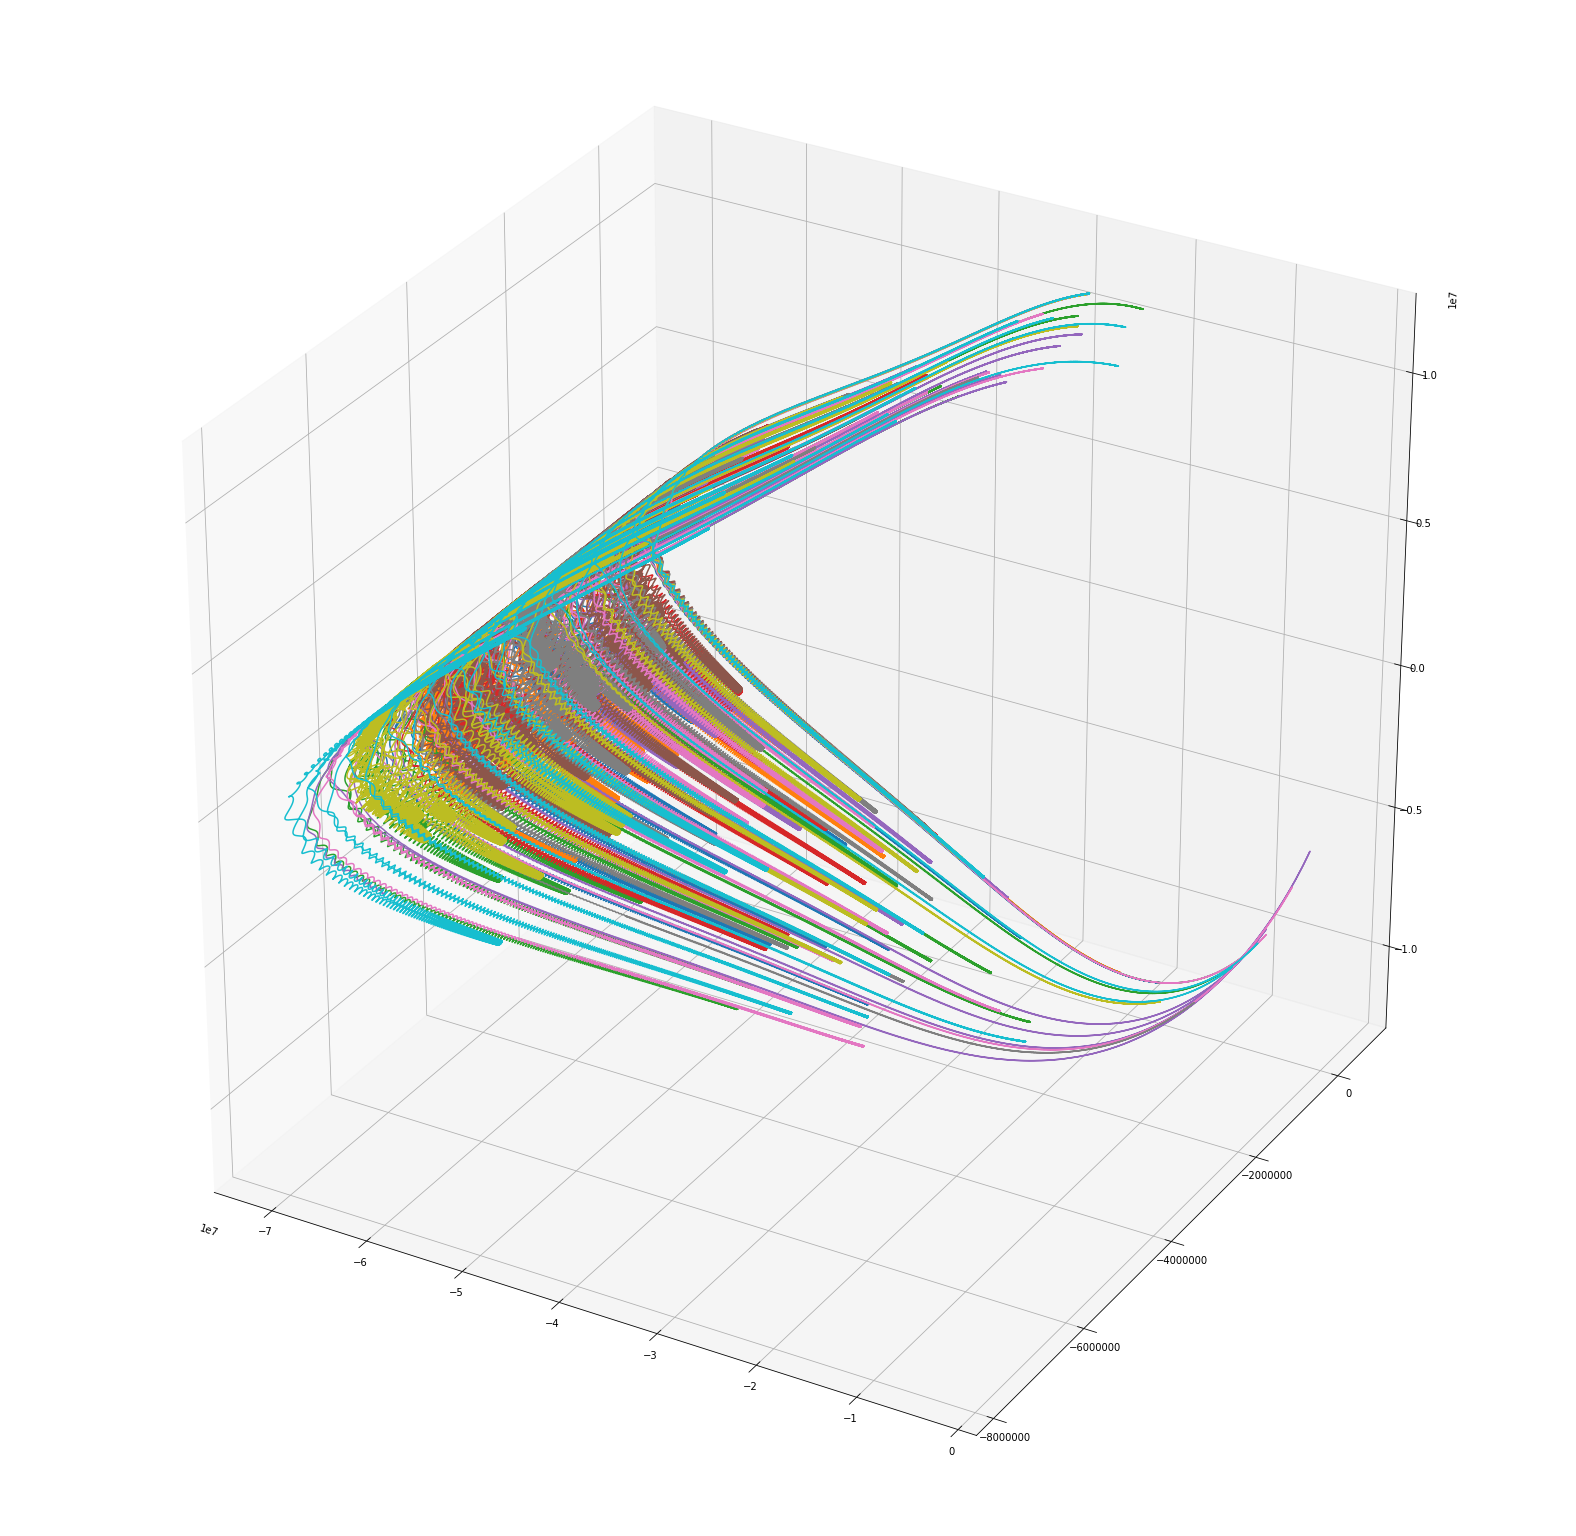

In [3]:
T      = 10        # Total time (in seconds)
dt     = 1e-4      # Simulation time step
trials = 10         # Number of runs
steps  = int(T / dt) # Number of steps per run

history, intrinsic = populate(trials,
                              steps,
                              e_field,
                              b_field,
                              delta(np.array([-4 * Re, 0, 1.85 * Re])),
                              delta(5e5),
                              delta(np.pi / 2),
                              uniform(0, 2 * np.pi)
                             )

solve(history, intrinsic, dt)

plot_traj(history)

In [4]:
eq_pas = eq_pitch_angle(history, intrinsic)
pos = position_mag(history) / Re
ts  = np.arange(0, np.shape(history)[1], 1) * dt

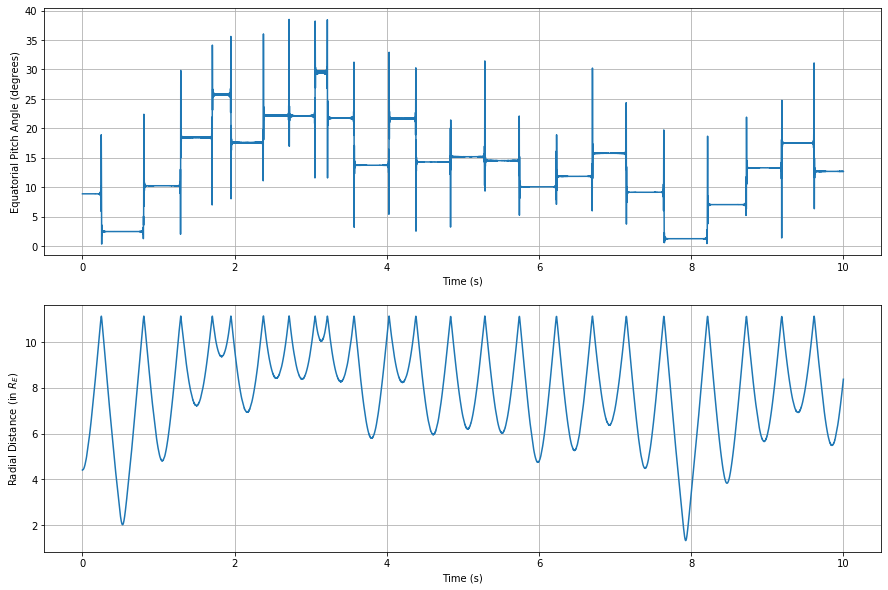

In [17]:
particle_num = 6

plt.figure(figsize=(15, 10))

plt.subplot(211)
plt.plot(ts, eq_pas[particle_num])
plt.xlabel('Time (s)')
plt.ylabel('Equatorial Pitch Angle (degrees)')
plt.grid()

plt.subplot(212)
plt.plot(ts, pos[particle_num])
plt.xlabel('Time (s)')
plt.ylabel('Radial Distance (in $R_E$)')
plt.grid()

plt.show()

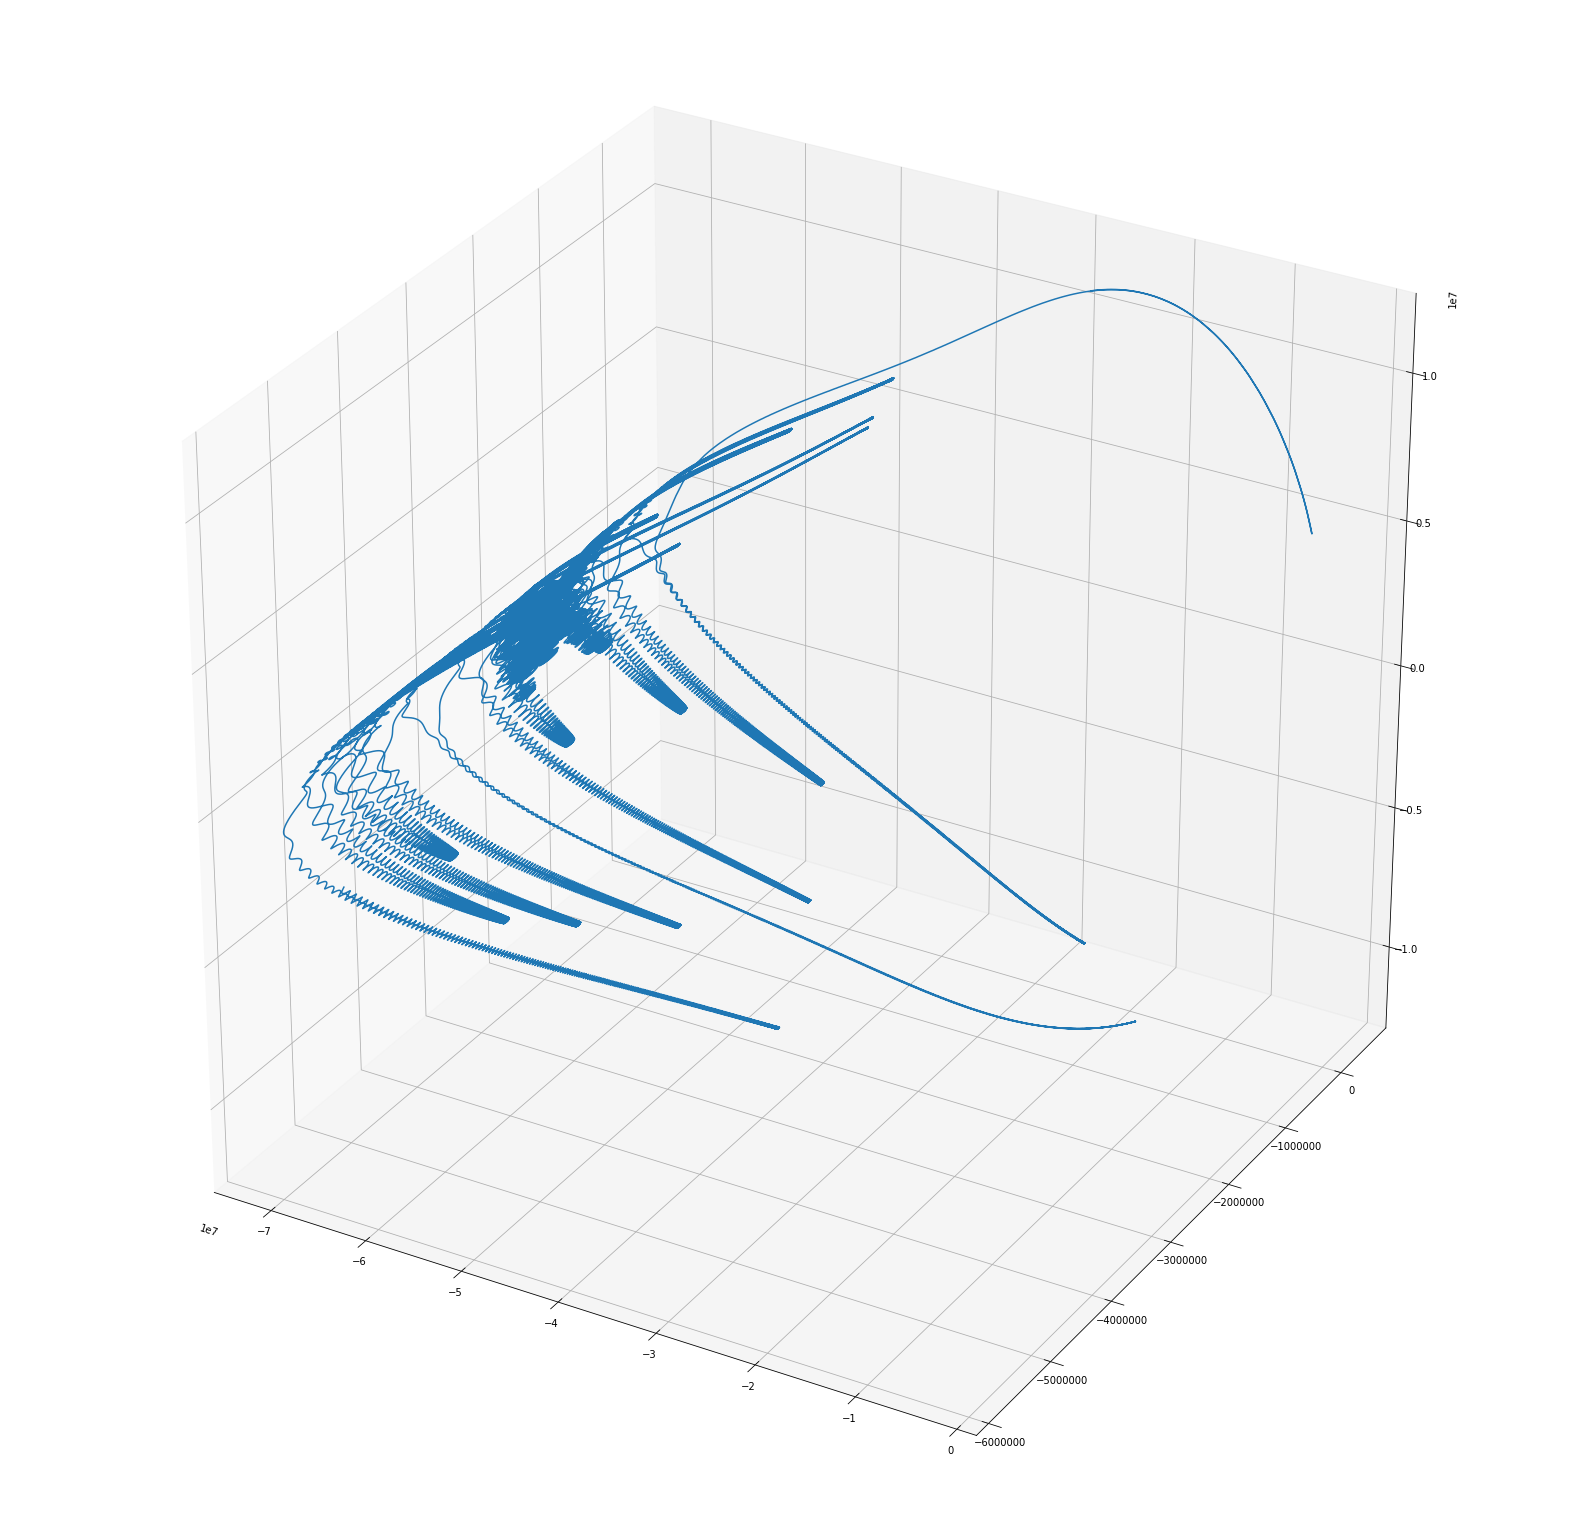

0.9870973455414138


In [30]:
T      = 10        # Total time (in seconds)
dt     = 1e-4      # Simulation time step
trials = 1         # Number of runs
steps  = int(T / dt) # Number of steps per run

history, intrinsic = populate(trials,
                              steps,
                              e_field,
                              b_field,
                              delta(np.array([-4 * Re, 0, 1.85 * Re])),
                              delta(5e5),
                              delta(np.radians(5)),
                              uniform(0, 2 * np.pi)
                             )

solve(history, intrinsic, dt)

plot_traj(history)

pos = position_mag(history) / Re
print(np.amin(pos))